In [ ]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.patches as mpatches
import matplotlib
matplotlib.style.use('ggplot')
#ols models
import statsmodels.formula.api as sm
from patsy import dmatrices
import re
import scipy as sp

In [185]:
%%writefile tools.py
#column names
def print_columns(dataframe):
    i = 0
    for column in dataframe.columns:
        print((i, column))
        i += 1

Writing tools.py


In [ ]:
#read data
df_full = pd.read_csv("../../Data/NEM_CurrentlyInterconnectedDataset_2016-03-31.csv", low_memory=False)

In [ ]:
#get year from date
df_full.ix[:,15] =  pd.to_datetime(df_full.ix[:,15], infer_datetime_format=True)
df_full['App Complete Date Year'] = df_full.ix[:,15].dt.year
df_full.columns = df_full.columns.str.replace(' ','_')
#clean a little bit
df_full = df_full[(df_full.T != 0).all()]

In [ ]:
#cheat sheet for column names
print_columns(df_full)

In [ ]:
#keep cleaning
df = df_full[(df_full['App_Complete_Date_Year'] > 2014) & (df_full['Total_System_Cost'] > 0.0)]
df['Installer_Name_clear'] = df['Installer_Name']

In [ ]:
df['Customer_Sector'].value_counts()

In [191]:
#df.to_csv('NEM_CurrentlyInterconnectedDataset_2016-03-31_clear.csv')

In [ ]:
#create dummies for companies
def company_dummy(row, templ, name):
    if not pd.isnull(row['Installer_Name_clear']):
        if templ.search(row['Installer_Name_clear']):
            val = name
        else:
            val = row['Installer_Name_clear']
    else:
        val = row['Installer_Name_clear']
    return val

In [ ]:
#regexes to clean installer names

In [ ]:
company_regex = r'SolarCity'
replace_name = 'SolarCity Corporation'
p = re.compile(company_regex, re.IGNORECASE)
df['Installer_Name_clear'] = df.apply (lambda row: company_dummy (row, p, replace_name),axis=1)

In [ ]:
company_regex = r'SunPower'
replace_name = 'SunPower Corporation'
p = re.compile(company_regex, re.IGNORECASE)
df['Installer_Name_clear'] = df.apply (lambda row: company_dummy (row, p, replace_name),axis=1)

In [ ]:
company_regex = r'Sunrun'
replace_name = 'Sunrun Installation Services, Inc'
p = re.compile(company_regex, re.IGNORECASE)
df['Installer_Name_clear'] = df.apply (lambda row: company_dummy (row, p, replace_name),axis=1)

In [ ]:
company_regex = r'Petersen\s+Dean'
replace_name = 'Petersen Dean Roofing & Solar Systems'
p = re.compile(company_regex, re.IGNORECASE)
df['Installer_Name_clear'] = df.apply (lambda row: company_dummy (row, p, replace_name),axis=1)

In [ ]:
company_regex = r'Semper Solaris'
replace_name = 'Semper Solaris Construction Inc'
p = re.compile(company_regex, re.IGNORECASE)
df['Installer_Name_clear'] = df.apply (lambda row: company_dummy (row, p, replace_name),axis=1)

In [ ]:
#Solarcity , Luminalt, RGS Energy, Vivint - biggest installers 

In [ ]:
df['Installer_Name_clear'] = df.apply (lambda row: company_dummy (row, p, replace_name),axis=1)

In [ ]:
df['Installer_Name_clear'].value_counts()

In [ ]:
df_short = df[['Total_System_Cost', 'System_Size_DC', 'System_Size_AC', 'Installer_Name_clear']]

In [ ]:
df_short = df_short[(df['Customer_Sector'] == 'Residential')]

In [ ]:
df_short['Count'] = 1

In [247]:
df_short['Price_Per_Watt'] = df_short['Total_System_Cost']/df_short['System_Size_AC']/1000
df_short = df_short[df_short['Price_Per_Watt'] > 1.0]
df_sub = df_short[(df_short['Installer_Name_clear'] == 'SunPower Corporation')]
#exclude huge outlier to make graph nicer
df_short = df_short[(df['Installer_Name_clear'] != 'Zero Energy Associates')]

/Users/wilfeli/anaconda/lib/python3.5/site-packages/pandas/core/frame.py:1942: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "DataFrame index.", UserWarning)


In [167]:
df_short['key1'] = df_short.groupby('Installer_Name_clear')['Count'].transform('sum')

In [168]:
df_short = df_short.sort_values(['key1'], ascending=[False])

In [169]:
grouped = df_short.groupby('Installer_Name_clear', sort=False)

In [170]:
df_agg = grouped.agg({'Total_System_Cost' : np.median,\
             'System_Size_AC' : np.median, \
            'Count' : np.sum, \
            'Price_Per_Watt' : np.median})

In [245]:
df_agg_top = df_agg[0:100]

In [246]:
df_agg_top

,Total_System_Cost,Price_Per_Watt,Count,System_Size_AC
Installer_Name_clear,,,,
SolarCity Corporation,25779.00,5.924523,3868,4.408000
SunPower Corporation,7301.00,4.292210,1451,1.779000
Petersen Dean Roofing & Solar Systems,27078.05,4.721451,1007,5.813000
"Sunrun Installation Services, Inc",22869.00,4.259788,746,5.446000
Semper Solaris Construction Inc,26901.00,5.033030,621,5.262000
Sullivan Solar Power,30285.50,5.181970,498,5.874000
Verengo,24628.00,4.704745,473,5.225000
Grid Alternatives,15790.83,5.197207,410,3.056000
American Solar Direct Inc,25936.95,5.320786,369,4.739000


In [211]:
import matplotlib.patches as mpatches

In [217]:
from matplotlib.legend_handler import HandlerPatch

/Users/wilfeli/anaconda/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


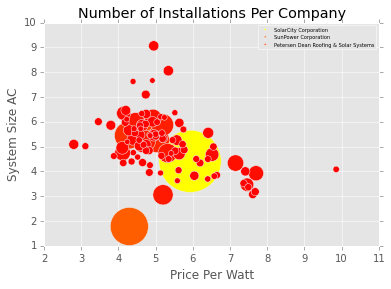

In [249]:
N = 100
x = df_agg_top['Price_Per_Watt']
y = df_agg_top['System_Size_AC']
norm = matplotlib.colors.Normalize(vmin=df_agg_top['Count'][99], vmax=df_agg_top['Count'][0])
cmap_custom = cm.get_cmap('autumn')
area = norm(df_agg_top['Count'])
color = []

for area_x in area:
    color.append(cmap_custom(area_x))
    
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Price Per Watt')
ax.set_ylabel('System Size AC')
    
#plt.xlabel('Price Per Watt')
#plt.ylabel('System Size AC')
plt.title('Number of Installations Per Company')

ax.scatter(x, y, s=df_agg_top['Count'],  c = color )
handles, labels = ax.get_legend_handles_labels()


display = (0,1,2)

#names are here
#df_agg.index.values[0:3]

#colors are here
#color[0:3]

artists = []
labels = []

#create custom artists
for i in range(3):
    artists.append(mpatches.Circle((0, 0), 1.0, facecolor=color[i]))
    labels.append(df_agg.index.values[i])


class HandlerEllipse(HandlerPatch):
    def create_artists(self, legend, orig_handle,
                       xdescent, ydescent, width, height, fontsize, trans):
        center = 0.5 * width - 0.5 * xdescent, 0.5 * height - 0.5 * ydescent
        p = mpatches.Circle(xy=center, radius=width/10)
        self.update_prop(p, orig_handle, legend)
        p.set_transform(trans)
        return [p]
    

#Create legend from custom artist/label lists
ax.legend(artists,
          labels,
         handler_map={mpatches.Circle: HandlerEllipse()}, bbox_to_anchor=(0.9, 0.9),
           bbox_transform=plt.gcf().transFigure, fontsize=5
         )



#plt.scatter(x, y, s=df_agg_top['Count'],  c = color )
plt.savefig('Installers_size.png', dpi=300)
plt.show()


In [243]:
df_sub['Price_Per_Watt'].describe()

count    1007.000000
mean        5.005716
std         2.838988
min         1.655887
25%         4.314610
50%         4.721451
75%         5.160272
max        54.659443
Name: Price_Per_Watt, dtype: float64

In [248]:
df_sub

,Total_System_Cost,System_Size_DC,System_Size_AC,Installer_Name_clear,Count,Price_Per_Watt,key1
395733,7993.00,1.644670,1.620,SunPower Corporation,1,4.933951,1451
400336,7500.00,1.796939,1.761,SunPower Corporation,1,4.258944,1451
395752,14418.97,3.288325,3.239,SunPower Corporation,1,4.451673,1451
395715,5178.00,1.233503,1.215,SunPower Corporation,1,4.261728,1451
395710,7661.00,1.652792,1.628,SunPower Corporation,1,4.705774,1451
395741,18724.00,4.418274,4.352,SunPower Corporation,1,4.302390,1451
378162,6286.00,1.825510,1.789,SunPower Corporation,1,3.513695,1451
395706,11738.00,2.479188,2.442,SunPower Corporation,1,4.806716,1451
395705,11738.00,2.479188,2.442,SunPower Corporation,1,4.806716,1451
395773,7661.00,1.652792,1.628,SunPower Corporation,1,4.705774,1451
